###                                          XML - eXtensible Markup Language.

XML was designed to store and transport data (nested documents).

XML was designed to be both human- and machine-readable.

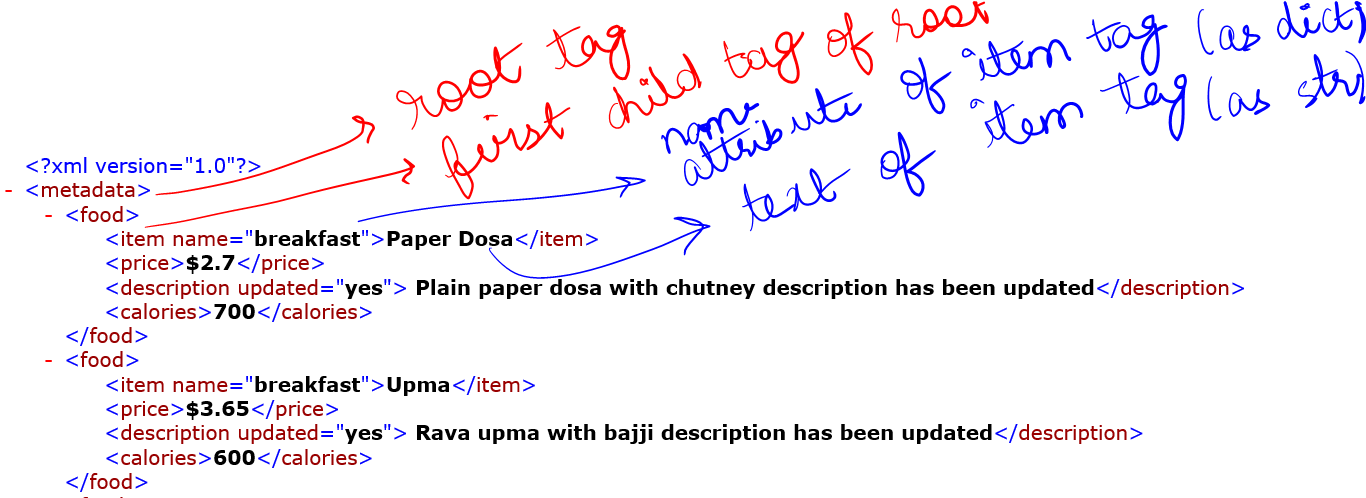

### Using etree.ElementTree module

Parsing xml

In [19]:
#import module

import xml.etree.ElementTree as ET

# parsing the xml file into my tree object using ET.parse method (its like a list of list of tags)

mytree = ET.parse("Sample.xml")

# obtaining root element of the xml using .getroot method

myroot = mytree.getroot()

# printing the name(tag) of the root
print(myroot.tag)

metadata


In [44]:
type(mytree)

xml.etree.ElementTree.ElementTree

In [17]:
type(myroot)

xml.etree.ElementTree.Element

In [18]:
type(myroot.tag)

str

In [23]:
# obtaining the first child tag of the root element

print(myroot[0].tag)

food


In [21]:
type(myroot[0])

xml.etree.ElementTree.Element

In [22]:
type(myroot[0].tag)

str

In [24]:
print(myroot[0].attrib)

{}


In [36]:
type(myroot[0].attrib)

dict

In [41]:
print(myroot[0].text)

In [40]:
type(myroot[0].text)

str

Finding elements of interest

In [25]:
for x in myroot[0]:
    print(x.tag)

item
price
description
calories


In [26]:
for x in myroot[0]:
    print(x.attrib)

{'name': 'breakfast'}
{}
{}
{}


In [27]:
for x in myroot[0]:
    print(x.text)

Idly
$2.5

   Two idly's with chutney
   
553


In [34]:
#finding food tags

myroot.findall('food')

[<Element 'food' at 0x000001DFC1E993B8>,
 <Element 'food' at 0x000001DFC1E99D68>,
 <Element 'food' at 0x000001DFC1E99EF8>,
 <Element 'food' at 0x000001DFC1EC1138>,
 <Element 'food' at 0x000001DFC1EC1368>]

In [31]:
type(myroot.findall('food'))

list

In [33]:
# printing all the food item names along with their prices

for x in myroot.findall('food'):
    
# extracting text from the item tag inside food tag

    item=x.find('item').text
    
    price=x.find('price').text
    
    print(item,price)

Idly $2.5
Paper Dosa $2.7
Upma $3.65
Bisi Bele Bath $4.50
Kesari Bath $1.95


Modifying elements

In [39]:
# iterating over description tags

type(myroot.iter('description'))

_elementtree._element_iterator

In [42]:
# updating the text in the description tags

for x in myroot.iter('description'):
    a=x.text+'description has been updated'
    x.text=a

In [43]:
# updating the attributes in the description tags

for x in myroot.iter('description'):
    x.set('updated','yes')

In [45]:
# adding the updated xml to a new file using .write method

mytree.write('new.xml')

Adding new element

In [46]:
# adding a new tag to the first child tag of the root using .SubElement

ET.SubElement(myroot[0], 'speciality')

for x in myroot.iter('speciality'):
    a = 'South Indian Special'
    x.text = a
mytree.write('new.xml')

Deleting elements

In [51]:
print(myroot[0][0].attrib)

#this gives the attribute of the item tag of the first food tag under the metadata root tag 

{'name': 'breakfast'}


deleting attibute

In [55]:
myroot[0][0].attrib.pop('name')

mytree.write('new.xml')

deleting tag under tag

In [56]:
#deleting item tag from the first food tag using .remove method

myroot[0].remove(myroot[0][0])

mytree.write('new.xml')

deleting complete tag

In [58]:
# deleting first food tag

myroot.remove(myroot[0])

mytree.write('new.xml')

# OR
# myroot[0].clear()
# mytree.write('new.xml')

<br>

### Using xml.dom.minidom module 

In [60]:
# parsing from xml file

from xml.dom import minidom

data= minidom.parse("Sample.xml")    

In [61]:
# parsing from xml string

data2= minidom.parseString('<myxml>Using<empty/> parseString</myxml>')

retreiving elements

In [65]:
#retreiving the first item tag

tagname= data.getElementsByTagName('item')[0]
print(tagname)

# retreiving attribute of the first item tag

print(tagname.attributes['name'].value)

# retreiving text of the first item tag

print(tagname.firstChild.data)

<DOM Element: item at 0x1dfc1f3cb88>
breakfast
Idly


In [66]:
# getting text from all the item tags

tagname= data.getElementsByTagName('item')
for x in tagname:
    print(x.firstChild.data)

Idly
Paper Dosa
Upma
Bisi Bele Bath
Kesari Bath


---